# Ödev 2

### 210601040 Şevval ÖZDEMİR

### Adım 1

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [73]:
df=pd.read_csv("telefon_fiyatlari.csv")

In [74]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
rf = RandomForestClassifier()

In [77]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [78]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [79]:
best_model = grid_search.best_estimator_

In [80]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.88      0.87      0.87        91
           2       0.81      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [82]:
test_accuracy_rfc = best_model.score(X_test, y_test)

In [84]:
print("En iyi model:", best_model)
print("En iyi parametreler:", grid_search.best_params_)
print("Test seti doğruluk oranı:", test_accuracy_rfc)

En iyi model: RandomForestClassifier(max_depth=20, min_samples_leaf=2)
En iyi parametreler: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test seti doğruluk oranı: 0.895


 Derste gördüğümüz modeller(SVM ve Decision Tree) için accuracy değerlerini görelim:

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#### SVM

In [90]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
print(f'SVM Model Accuracy: {svm_accuracy:.2f}')

SVM Model Accuracy: 0.96


#### Decision Tree

In [91]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_model.predict(X_test))
print(f'Decision Tree Model Accuracy: {decision_tree_accuracy:.2f}')

Decision Tree Model Accuracy: 0.84


* sklearn kütüphanesinden bir model seçip onu da ekleyelim. KNN(En yakın komşu) algoritması olsun.

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
print(f'K-Nearest Neighbors Model Accuracy: {knn_accuracy:.2f}')

K-Nearest Neighbors Model Accuracy: 0.94


C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Adım 2

Her model için en iyi sınıflandırma başarınızı bir grafik üzerinde gösteriniz. 

In [96]:
models = ['Decision Tree', 'SVM', 'KNN', 'Best Model']
accuracies = [decision_tree_accuracy, svm_accuracy, knn_accuracy,test_accuracy_rfc ]

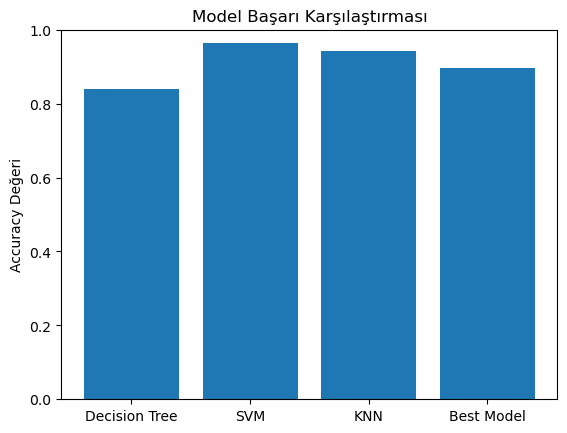

In [139]:
plt.bar(models, accuracies)
plt.ylabel('Accuracy Değeri')
plt.title('Model Başarı Karşılaştırması')
plt.ylim(0, 1)
plt.show()

* En başarılı model SVM oldu.

### Adım 3 

En başarılı modeli test veri seti üzerinde çalıştırarak çeşitli sınıflandırma metriklerini yazdırınız. 
Karmaşıklık matrisini seaborn kütüphanesinin heatmap fonksiyonu ile çizdiriniz.

In [101]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



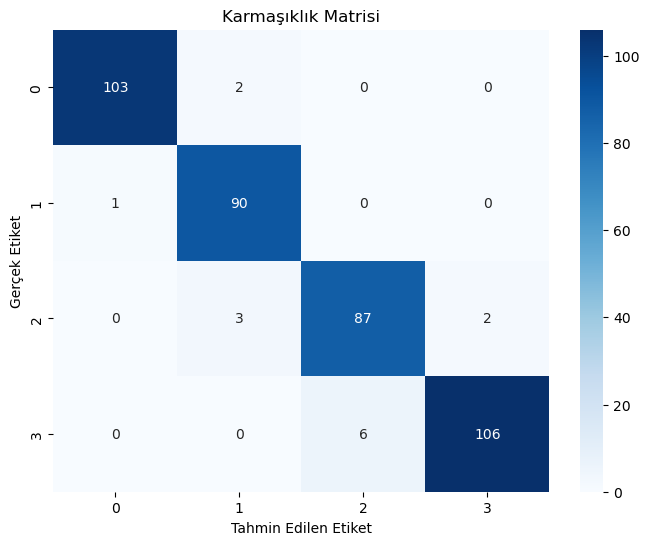

In [100]:
# SVM modelini test veri seti üzerinde değerlendir
y_pred = svm_model.predict(X_test)

# Sınıflandırma metriklerini yazdır
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Karmaşıklık Matrisini çiz
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3'])
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

### Adım 4

In [105]:
import numpy as np
from sklearn.preprocessing import StandardScaler

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestCl

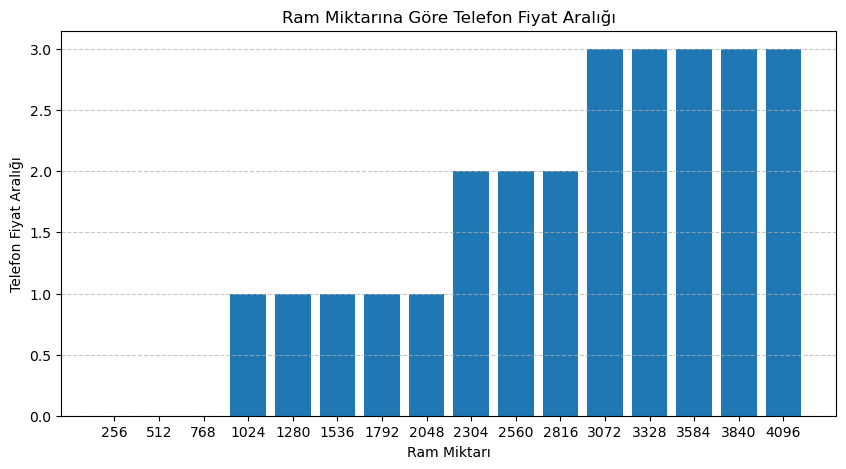

In [146]:
planlanan_telefon = pd.read_excel("PlanlananTelefon.xlsx")
ram_miktarlari = np.arange(256, 4097, 256)
fiyat_araligi = []

for ram in ram_miktarlari:
    planlanan_telefon["ram"] = ram
    fiyat_araligi.append(best_model.predict([planlanan_telefon.iloc[0]])[0])

plt.figure(figsize=(10,5))
plt.bar([f"{ram}" for ram in ram_miktarlari], fiyat_araligi)
plt.xlabel("Ram Miktarı")
plt.ylabel("Telefon Fiyat Aralığı")
plt.title("Ram Miktarına Göre Telefon Fiyat Aralığı")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Adım 5

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestCl

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestCl

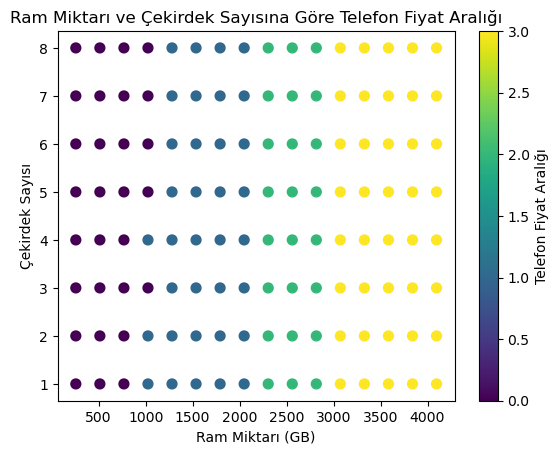

In [137]:
planlanan_telefon = pd.read_excel("planlanantelefon.xlsx")
ram_miktarlari = np.arange(256, 4097, 256)
cekirdek_sayilari = np.arange(1, 9)
tahminler = []

for ram in ram_miktarlari:
    for cekirdek_sayisi in cekirdek_sayilari:
        planlanan_telefon["ram"] = ram
        planlanan_telefon["n_cores"] = cekirdek_sayisi
        tahmin = best_model.predict([planlanan_telefon.iloc[0]])[0]
        tahminler.append((ram, cekirdek_sayisi, tahmin))

#Scatter plot çiz
ramlar, cekirdekler, fiyat_araliklari = zip(*tahminler)
plt.scatter(ramlar, cekirdekler, c=fiyat_araliklari, cmap='viridis', s=50)
plt.xlabel('Ram Miktarı (GB)')
plt.ylabel('Çekirdek Sayısı')
plt.title('Ram Miktarı ve Çekirdek Sayısına Göre Telefon Fiyat Aralığı')
plt.colorbar(label='Telefon Fiyat Aralığı')
plt.show()